## Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

## Loading and Pre-processing Weather Images

In [9]:
#download the weather images and put them in a directory
path = r'\Users\sstorer\OneDrive\ML Specialization\Data Sets\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [11]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [13]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

## Compiling and Runnning

In [20]:
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 16,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 26s 782ms/step - accuracy: 0.6523 - loss: 0.1072 - val_accuracy: 0.7991 - val_loss: 0.0754
Epoch 2/16
 1/28 ━━━━━━━━━━━━━━━━━━━━ 18s 667ms/step - accuracy: 0.7812 - loss: 0.0907

C:\Users\sstorer\AppData\Local\anaconda3\envs\tf-env\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.7812 - loss: 0.0907 - val_accuracy: 0.8348 - val_loss: 0.0666
Epoch 3/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 750ms/step - accuracy: 0.7959 - loss: 0.0740 - val_accuracy: 0.8036 - val_loss: 0.0780
Epoch 4/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.8125 - loss: 0.0734 - val_accuracy: 0.8214 - val_loss: 0.0687
Epoch 5/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 727ms/step - accuracy: 0.8121 - loss: 0.0658 - val_accuracy: 0.8080 - val_loss: 0.0825
Epoch 6/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.8750 - loss: 0.0530 - val_accuracy: 0.7946 - val_loss: 0.0866
Epoch 7/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 732ms/step - accuracy: 0.8177 - loss: 0.0691 - val_accuracy: 0.8214 - val_loss: 0.0741
Epoch 8/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.8125 - loss: 0.0729 - val_accuracy: 0.8170 - val_loss: 0.0659
Epoch 9/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 758ms/step - accuracy: 0.8585 - loss: 0.0502 - val_accuracy: 0.8661 - 

## Results

In [23]:
results = pd.DataFrame(model.history.history)

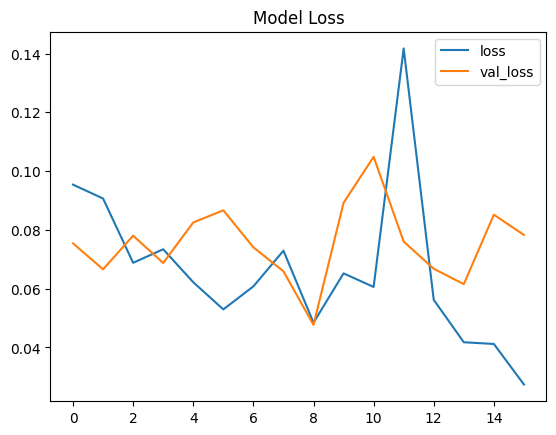

In [25]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

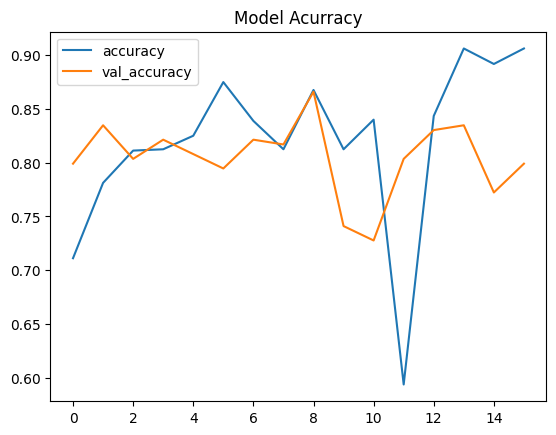

In [27]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [29]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.90625, Val_Accuracy: 0.7991071343421936
Loss: 0.027408532798290253, Val_Loss: 0.07828231900930405


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step


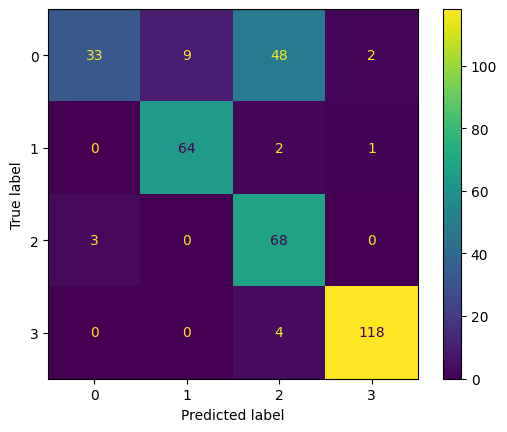

In [31]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [35]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


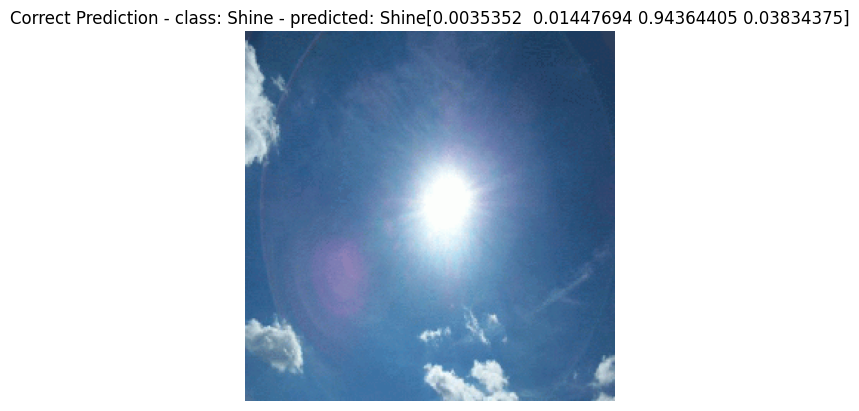

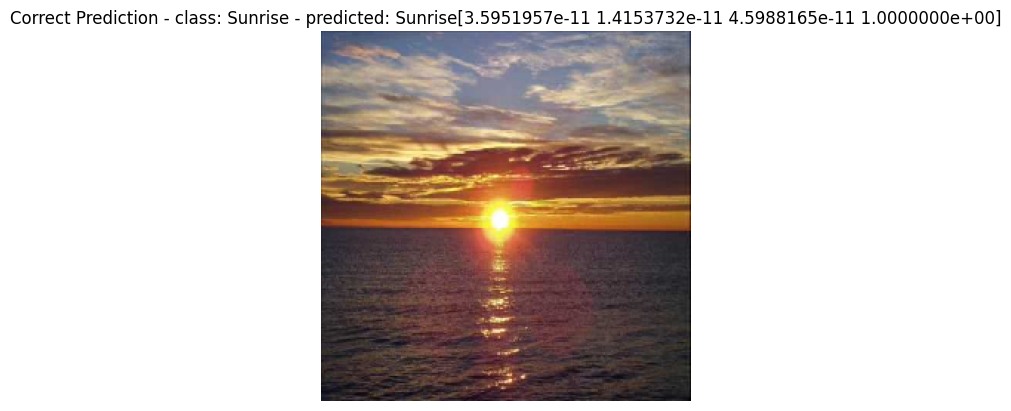

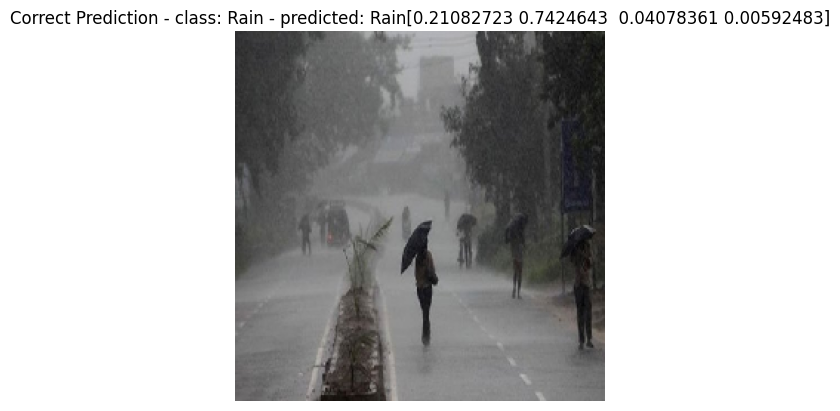

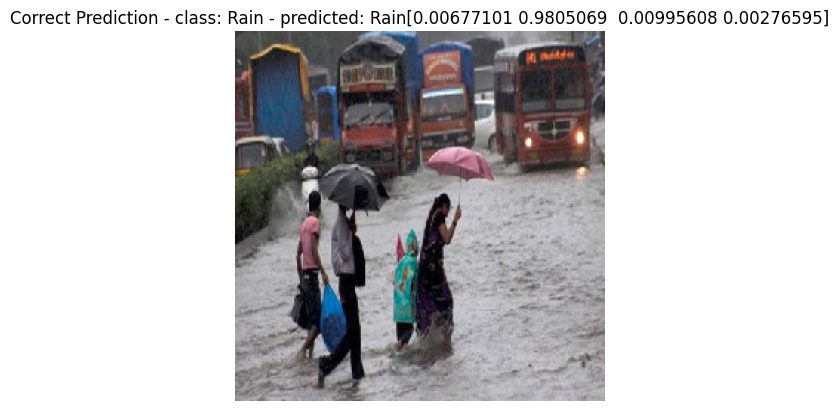

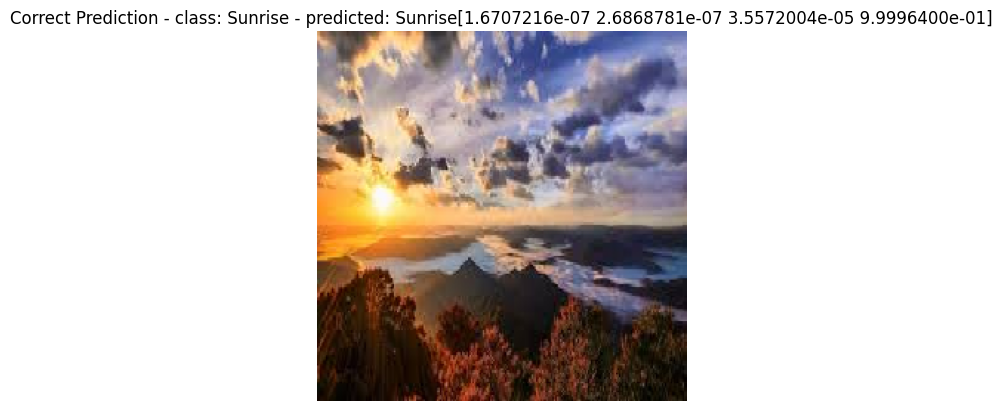

In [37]:
predict_one(model, 5)